<a href="https://colab.research.google.com/github/santoshmn26/Intro-to-Machine-Learning/blob/master/Linear_regression/Pubg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import files, drive
import warnings
warnings.filterwarnings("ignore")


In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv("/content/gdrive/My Drive/PUBG/train_V2.csv")

In [21]:
print(data.shape)
data.head()

(4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [0]:
pros = data.loc[data['kills'] > data['kills'].quantile(0.99)]
noobs = data.loc[data['kills'] < 1 ]
data.loc[data['kills'] > data['kills'].quantile(0.99)] = 8

In [24]:
print("Total pro players: ", pros.shape[0])
print("Total noobs and bots: ", noobs.shape[0])

Total pro players:  33362
Total noobs and bots:  2529722


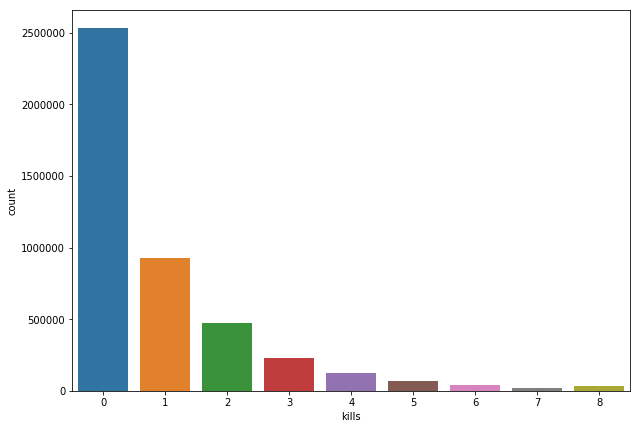

In [0]:
plt.figure(figsize=(10,7))
sns.countplot(data['kills'].sort_values())

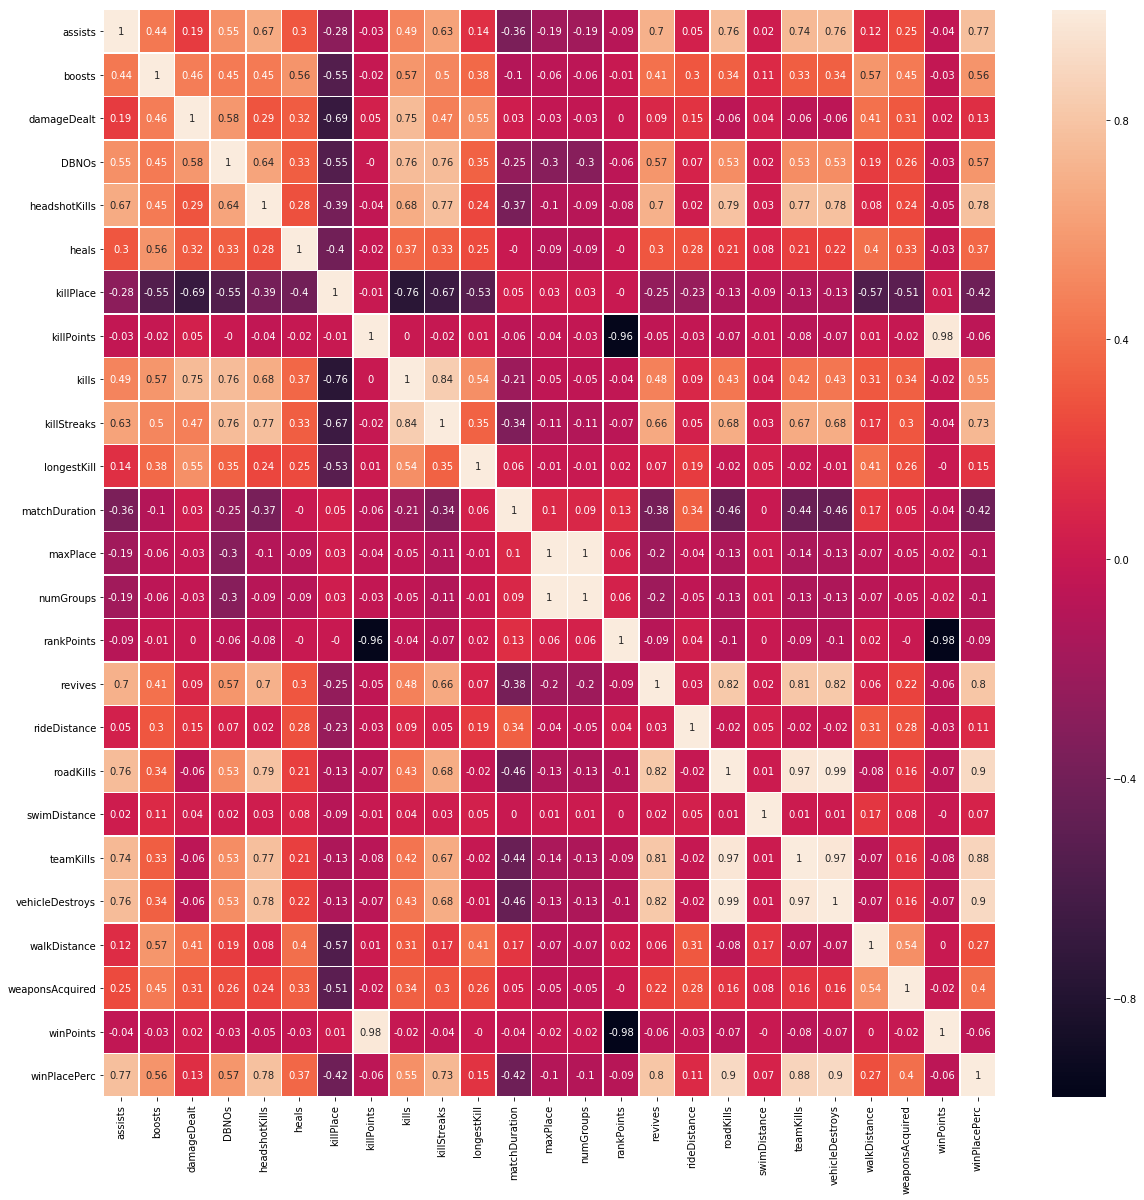

In [25]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data = correlation_matrix, annot = True, linewidths = .5, ax = ax)

In the data set we have both Categorical and Numerical data.
Categorical Data

Lets check how many Categorical and Numerical data is present in our data set

In [0]:
data.dtypes.sort_values()

From the data set we can see that we have : 

          1.  Integer data = 19
          2.  Float data = 6
          3.  Object / String data = 4
          
Now we need to convert this categorical into numerical data.

But First Lets analyze those categorical data column.

We have,

          1. uId       : This is a unique ID generated for each player.
        
          2. matchId   : This to is a unique ID generated for each match. So, This is repeated     for multiple users
         
          3. groupId   : This to is a unique ID generated for each team. So, This is repated for multiple users (few duplicated compared to matchId).
          
          4. matchType : This is feature that indicated if the game played is a Duo or a Solo or squad.

Now Let's Work on preprocessing the data. 

This is a very crucial step in ML. 

***"Garbage IN Garbage OUT"***. 

That is if we feed garbage data to our ML model we get garbage results from our model.

Let's first convert our categorical data into Numerical data.


In [0]:
print(data['matchType'].unique())

['squad' 'duo' 'solo']


In [0]:
data['matchType'] = data['matchType'].map(lambda x: 'squad' if('squad' in x) else 'duo' if('duo' in x) else 'solo')
data.head()

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_data_index = [0,1,2,25]
for i in categorical_data_index:
  data.iloc[:,i] = labelencoder.fit_transform(data.iloc[:, i].astype(str))
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2199488,611591,30084,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,10648,1,1466,0.4444
1,4119864,824867,32750,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,6632,5,0,0.6400
2,528063,840496,3143,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,7188,2,0,0.7755
3,1207619,1335666,45258,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,9407,3,0,0.1667
4,850115,1751535,20531,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,20031,2,0,0.1875


Now we have all Numerical data!

Next Let's check for duplicates and null values

In [0]:
for col in data.columns:
  print("Null values for "+col,": ",sum(data[col].isnull()))
print("Duplicated data: ",sum(data.duplicated()))

Good new no need to worry about null values!!
Lets drop those duplicates

In [28]:
data = data.drop_duplicates()
data = data[data['winPlacePerc'].notnull()]
print("Confirm droping of duplicates :", sum(data.duplicated()))

Confirm droping of duplicates : 0


Now lets split our data set from dependent variable and independent variable / Feature variable.

Our goal for this project is to predict the ***winPlacePerc*** so this is our dependent variable.

Everything else is our feature variable.

In [29]:
x_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]
print(x_train.shape,y_train.shape)


(4413604, 28) (4413604,)


In [32]:
test_data = pd.read_csv("/content/gdrive/My Drive/PUBG/test_V2.csv")
test_data['matchType'] = test_data['matchType'].map(lambda x: 'squad' if('squad' in x) else 'duo' if('duo' in x) else 'solo')
test_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [33]:
from sklearn.preprocessing import LabelEncoder
categorical_data_index = [0,1,2,15]
for i in categorical_data_index:
  test_data.iloc[:,i] = labelencoder.fit_transform(test_data.iloc[:, i].astype(str))
test_data.head()  

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,1111224,357523,5514,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,2,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,751316,231759,5268,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,0,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,753096,39107,10783,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,2,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,1566404,634157,2174,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,0,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,1800775,352749,5106,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,2,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0


So we have our 2D matrix of x and a 1D matrix of y

Let's prepare our train test split

In [0]:
from sklearn.linear_model import LinearRegression
regressor_2 = LinearRegression()
regressor_2.fit(x_train,y_train)


In [0]:
pred = regressor_2.predict(test_data)

In [14]:
print("Model score: ",round(regressor_2.score(x_train,y_train) * 100))

Model score:  83.0


In [41]:
x_train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,2,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,2,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,0,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,2,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,1,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2


***The Model Score is not too bad at 83%*** 
